In [4]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [6]:
base_dir = "C://Users//arjun//Desktop//alzi//Alzheimer_s Dataset//"

In [7]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [8]:
train=base_dir+ 'train/'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [9]:
val=base_dir+ 'train/'

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [10]:
test=base_dir +'test/'

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [11]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [12]:
train_data.class_names = class_names
val_data.class_names = class_names

In [13]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


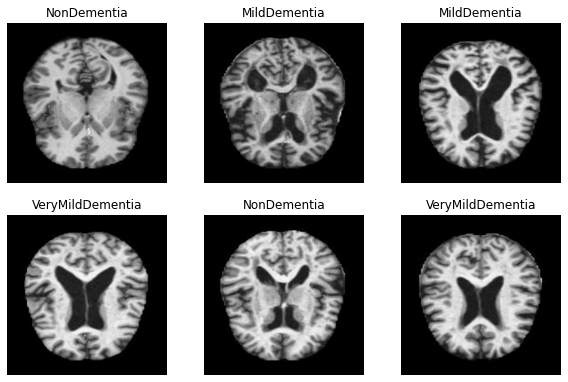

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [17]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 70s 541ms/step - loss: 1.7942 - accuracy: 0.3112 - val_loss: 1.2522 - val_accuracy: 0.4961
Epoch 2/10
129/129 [==============================] - 116s 868ms/step - loss: 1.2725 - accuracy: 0.3800 - val_loss: 1.1528 - val_accuracy: 0.5078
Epoch 3/10
129/129 [==============================] - 111s 859ms/step - loss: 1.2343 - accuracy: 0.4035 - val_loss: 1.1431 - val_accuracy: 0.5078
Epoch 4/10
129/129 [==============================] - 102s 786ms/step - loss: 1.1828 - accuracy: 0.4330 - val_loss: 1.1000 - val_accuracy: 0.5078
Epoch 5/10
129/129 [==============================] - 102s 788ms/step - loss: 1.1454 - accuracy: 0.4396 - val_loss: 1.0778 - val_accuracy: 0.5078
Epoch 6/10
129/129 [==============================] - 92s 713ms/step - loss: 1.1284 - accuracy: 0.4467 - val_loss: 1.0688 - val_accuracy: 0.5078
Epoch 7/10
129/129 [==============================] - 106s 819ms/step - loss: 1.1113 - accuracy: 0.4555 - val_loss: 1.0300 - v

In [21]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 69s 538ms/step - loss: 1.0243 - accuracy: 0.4926 - val_loss: 0.9714 - val_accuracy: 0.5684
Epoch 2/10
129/129 [==============================] - 72s 560ms/step - loss: 1.0075 - accuracy: 0.5092 - val_loss: 1.0065 - val_accuracy: 0.5605
Epoch 3/10
129/129 [==============================] - 79s 608ms/step - loss: 1.0036 - accuracy: 0.4972 - val_loss: 0.9148 - val_accuracy: 0.5293
Epoch 4/10
129/129 [==============================] - 68s 530ms/step - loss: 0.9918 - accuracy: 0.5106 - val_loss: 0.9298 - val_accuracy: 0.5762
Epoch 5/10
129/129 [==============================] - 67s 519ms/step - loss: 0.9701 - accuracy: 0.5179 - val_loss: 0.9128 - val_accuracy: 0.5752
Epoch 6/10
129/129 [==============================] - 66s 510ms/step - loss: 0.9614 - accuracy: 0.5355 - val_loss: 0.9379 - val_accuracy: 0.5859
Epoch 7/10
129/129 [==============================] - 67s 517ms/step - loss: 0.9568 - accuracy: 0.5328 - val_loss: 0.8852 - val_ac

In [22]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 65s 506ms/step - loss: 0.8952 - accuracy: 0.5782 - val_loss: 0.8364 - val_accuracy: 0.6094
Epoch 2/10
129/129 [==============================] - 67s 516ms/step - loss: 0.8838 - accuracy: 0.5917 - val_loss: 0.8532 - val_accuracy: 0.6055
Epoch 3/10
129/129 [==============================] - 65s 502ms/step - loss: 0.8845 - accuracy: 0.5885 - val_loss: 0.8180 - val_accuracy: 0.6182
Epoch 4/10
129/129 [==============================] - 66s 512ms/step - loss: 0.8410 - accuracy: 0.6043 - val_loss: 0.7924 - val_accuracy: 0.5986
Epoch 5/10
129/129 [==============================] - 66s 514ms/step - loss: 0.8526 - accuracy: 0.6012 - val_loss: 0.7633 - val_accuracy: 0.6250
Epoch 6/10
129/129 [==============================] - 65s 505ms/step - loss: 0.8078 - accuracy: 0.6256 - val_loss: 0.7712 - val_accuracy: 0.6094
Epoch 7/10
129/129 [==============================] - 67s 519ms/step - loss: 0.7808 - accuracy: 0.6324 - val_loss: 0.7328 - val_ac

In [23]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 50s 385ms/step - loss: 0.7222 - accuracy: 0.6805 - val_loss: 0.6034 - val_accuracy: 0.7275
Epoch 2/10
129/129 [==============================] - 58s 446ms/step - loss: 0.6839 - accuracy: 0.7071 - val_loss: 0.6130 - val_accuracy: 0.7148
Epoch 3/10
129/129 [==============================] - 61s 475ms/step - loss: 0.6135 - accuracy: 0.7300 - val_loss: 0.5498 - val_accuracy: 0.7646
Epoch 4/10
129/129 [==============================] - 64s 494ms/step - loss: 0.5659 - accuracy: 0.7610 - val_loss: 0.5166 - val_accuracy: 0.7686
Epoch 5/10
129/129 [==============================] - 65s 504ms/step - loss: 0.5264 - accuracy: 0.7723 - val_loss: 0.5087 - val_accuracy: 0.7734
Epoch 6/10
129/129 [==============================] - 66s 510ms/step - loss: 0.5228 - accuracy: 0.7747 - val_loss: 0.4461 - val_accuracy: 0.7900
Epoch 7/10
129/129 [==============================] - 65s 502ms/step - loss: 0.4766 - accuracy: 0.7908 - val_loss: 0.6530 - val_ac

In [24]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 73s 561ms/step - loss: 0.4134 - accuracy: 0.8138 - val_loss: 0.3656 - val_accuracy: 0.8281
Epoch 2/10
129/129 [==============================] - 71s 545ms/step - loss: 0.6243 - accuracy: 0.7261 - val_loss: 0.4234 - val_accuracy: 0.8271
Epoch 3/10
129/129 [==============================] - 71s 551ms/step - loss: 0.3967 - accuracy: 0.8213 - val_loss: 0.3201 - val_accuracy: 0.8896
Epoch 4/10
129/129 [==============================] - 70s 540ms/step - loss: 0.3498 - accuracy: 0.8445 - val_loss: 0.3503 - val_accuracy: 0.8770
Epoch 5/10
129/129 [==============================] - 73s 562ms/step - loss: 0.3056 - accuracy: 0.8682 - val_loss: 0.2684 - val_accuracy: 0.9111
Epoch 6/10
129/129 [==============================] - 73s 560ms/step - loss: 0.2946 - accuracy: 0.8806 - val_loss: 0.2906 - val_accuracy: 0.8994
Epoch 7/10
129/129 [==============================] - 73s 561ms/step - loss: 0.2350 - accuracy: 0.9043 - val_loss: 0.2623 - val_ac

In [25]:
model.evaluate(test_data)

40/40 [==============================] - 12s 279ms/step - loss: 1.5682 - accuracy: 0.6474


[1.568235993385315, 0.6473807692527771]

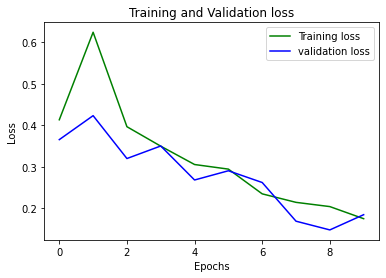

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()



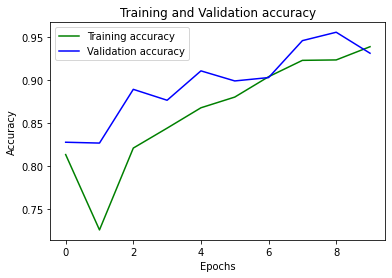

In [27]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [28]:
class_names={0:"Mild Dementia", 1:"Moderate Dementia", 2:"Non Dementia", 3:"Very Mild Dementia"}

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


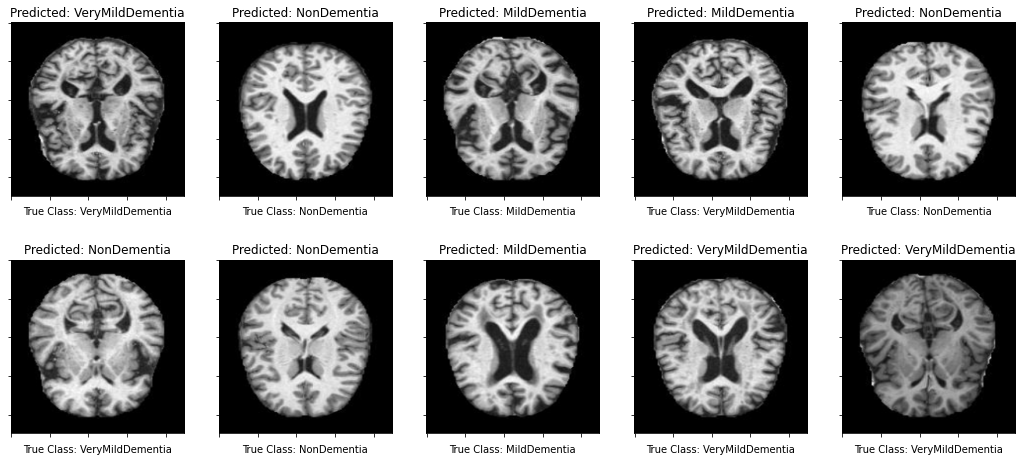

In [15]:
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        print(x.shape)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))          

In [32]:
model.save("alzi_model.h5")

In [1]:
from tensorflow import keras
model = keras.models.load_model('C://Users//arjun//Desktop//inhouse//flask_app//alzi_model.h5')


In [18]:
val_data.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>